In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import keras
import seaborn as sns
sns.set()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


In [ ]:
!pip install tensor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for tensor: filename=tensor-0.3.6-py3-none-any.whl size=71552 sha256=e952b25b5512cc2474712ca49c3228cfddfa27c2cd26fb1ba73e1baf5e0dda2b
  Stored in directory: /root/.cache/pip/wheels/b8/d7/e8/f4760f8bcef039fce5899d36f67a8

In [ ]:
df= pd.read_csv('/content/1900_2021_DISASTERS.xlsx - emdat data.csv')

In [ ]:
df.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


In [ ]:
# Convert the 'Start Day' column to a datetime type
df['Start Day'] = pd.to_datetime(df['Start Day'], format='%d')

# Format the 'Start Day' column as two digits
df['Start Day'] = df['Start Day'].dt.strftime('%d')

In [ ]:
# Convert the 'Start Month' column to a datetime type
df['Start Month'] = pd.to_datetime(df['Start Month'], format='%m')

# Format the 'Start Month' column as two digits
df['Start Month'] = df['Start Month'].dt.strftime('%m')

In [ ]:
# Convert the 'Start Year' column to a datetime type
df['End Day'] = pd.to_datetime(df['End Day'], format='%d')

# Format the 'Start Day' column as two digits
df['End Day'] = df['End Day'].dt.strftime('%d')

In [ ]:
# Convert the 'End Month' column to a datetime type
df['End Month'] = pd.to_datetime(df['End Month'], format='%m')

# Format the 'End Month' column as two digits
df['End Month'] = df['End Month'].dt.strftime('%m')

In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Start Month', 'Start Day']].astype(str).apply(' '.join, axis=1), format='%Y %m %d', errors='ignore')

In [ ]:
df['End Date'] = pd.to_datetime(df[['End Year', 'End Month', 'End Day']].astype(str).apply(' '.join, axis=1), format='%Y %m %d', errors='ignore')

In [ ]:
df1 = df[(df['Date'] >= '2010-01-01') & (df['Date'] <= '2021-09-07')]

In [ ]:
df1 = df[(df['End Date'] >= '2010-01-01') & (df['End Date'] <= '2023-09-07')]

In [ ]:
pd.options.mode.copy_on_write = True

In [ ]:
columns_to_delete = ['Admin1 Code','Location','Disaster Group','Dis Mag Value','Continent','Dis Mag Scale','Disaster Subtype','Latitude','Event Name','Disaster Subgroup','Admin2 Code', 'Origin','Disaster Subsubtype', 'Appeal', 'River Basin','Total Affected','No Injured','No Affected','Adm Level','OFDA Response','Declaration','Seq', 'ISO', 'Geo Locations', 'CPI', 'Aid Contribution', 'Associated Dis', 'Associated Dis2', 'Local Time', 'Region', 'Longitude','ISO','Glide', 'No Homeless']
df1.drop(columns=columns_to_delete, inplace=True)


In [ ]:
# Check which columns are present in the DataFrame
existing_columns = df1.columns

# Modify the columns_to_delete list to include only existing columns
columns_to_delete = [col for col in columns_to_delete if col in existing_columns]

# Drop the specified columns from the DataFrame
df1.drop(columns=columns_to_delete, inplace=True)


In [ ]:
# Replace 'nan' values in the 'End Date' column with a placeholder
df1['End Date'].fillna('9999-12-31', inplace=True)

# Convert 'End Date' column to datetime format
df1['End Date'] = pd.to_datetime(df1['End Date'], errors='coerce')

# Extract year from 'End Date' column
df1['Year'] = df1['End Date'].dt.year

# Replace NaN values in the 'Year' column with the corresponding year extracted from the 'End Date' column
df1['Year'].fillna(pd.to_datetime(df1['End Date']).dt.year, inplace=True)

# Drop the 'End Date' column if it's no longer needed
df1.drop(columns=['End Date'], inplace=True)

# Drop rows with NaN values in the 'Year' column
df1.dropna(subset=['Year'], inplace=True)


<ipython-input-16-8f46d2026c2a>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['End Date'] = pd.to_datetime(df1['End Date'], errors='coerce')


In [ ]:
columns_to_delete = ['Year','Start Year', 'Start Month','Start Day','End Day','End Year', 'End Month']
df1.drop(columns=columns_to_delete, inplace=True)

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.isnull().sum()

Disaster Type                 0
Country                       0
Total Deaths                  0
Insured Damages ('000 US$)    0
Total Damages ('000 US$)      0
Date                          0
dtype: int64

In [ ]:
df1.head(10)

,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$),Date
11372,Flood,Australia,35.0,2500000.0,7300000.0,2010 12 25
11434,Flood,Colombia,418.0,14000.0,1000000.0,2010 04 06
11516,Flood,Brazil,900.0,50000.0,1000000.0,2011 01 11
11522,Flood,China,467.0,195000.0,6400000.0,2011 06 01
11530,Storm,Australia,1.0,1300000.0,2500000.0,2011 02 02
11554,Flood,Canada,5.0,157000.0,800000.0,2011 04 04
11576,Earthquake,Spain,10.0,100000.0,200000.0,2011 05 11
11933,Earthquake,Japan,19846.0,37500000.0,210000000.0,2011 03 11
11943,Flood,Thailand,813.0,10000000.0,40000000.0,2011 08 05
11948,Storm,United States of America (the),39.0,1425000.0,1900000.0,2011 01 31


In [ ]:
df1.shape

(262, 6)

In [ ]:
stock_data= pd.read_csv('/content/sp500_stocks.csv')

In [ ]:
stock_data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,53.295380,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,52.961578,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,53.712658,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,53.751171,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,54.129951,84.320000,84.320000,83.300003,83.690002,3405800.0


In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')


In [ ]:
stock_data.dropna(inplace=True)

In [ ]:
stock_data.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [ ]:
# Descriptive statistics for stock market data (adjust columns as needed)
print("Stock Market Data Statistics:")
print(stock_data[["Open", "High", "Low", 'Close', "Adj Close"]].describe())  # Focus on specific columns

Stock Market Data Statistics:
               Open          High           Low         Close     Adj Close
count  1.373892e+06  1.373892e+06  1.373892e+06  1.373892e+06  1.373892e+06
mean   1.039572e+02  1.051229e+02  1.027796e+02  1.039817e+02  9.691151e+01
std    2.131005e+02  2.157131e+02  2.105944e+02  2.132080e+02  2.131655e+02
min    7.000000e-01  7.100000e-01  6.500000e-01  7.000000e-01  7.000000e-01
25%    3.453000e+01  3.492000e+01  3.414000e+01  3.454000e+01  2.879197e+01
50%    6.129000e+01  6.193000e+01  6.064000e+01  6.131000e+01  5.327001e+01
75%    1.094565e+02  1.105900e+02  1.082600e+02  1.094500e+02  9.974442e+01
max    7.760000e+03  7.825000e+03  7.679600e+03  7.709270e+03  7.709270e+03


In [ ]:
df1['Date'].value_counts()

Date
2017 09 08    4
2016 04 16    3
2017 01 18    2
2015 11 25    2
2012 09 07    2
             ..
2013 12 01    1
2013 04 07    1
2013 03 18    1
2013 06 06    1
2020 08 16    1
Name: count, Length: 236, dtype: int64

In [ ]:
# Drop rows with NaN values in the 'Date' column
df1.dropna(subset=['Date'], inplace=True)


In [ ]:
# Specify the indices of the rows to be deleted
indices_to_delete = [14843, 15581]

# Drop rows with the specified indices
df1.drop(indices_to_delete, inplace=True)


In [ ]:
df1[df1['Date'].str.contains('nan')]

,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$),Date


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])


<ipython-input-33-9fe283079361>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Country', data=top_10_countries, palette='viridis')


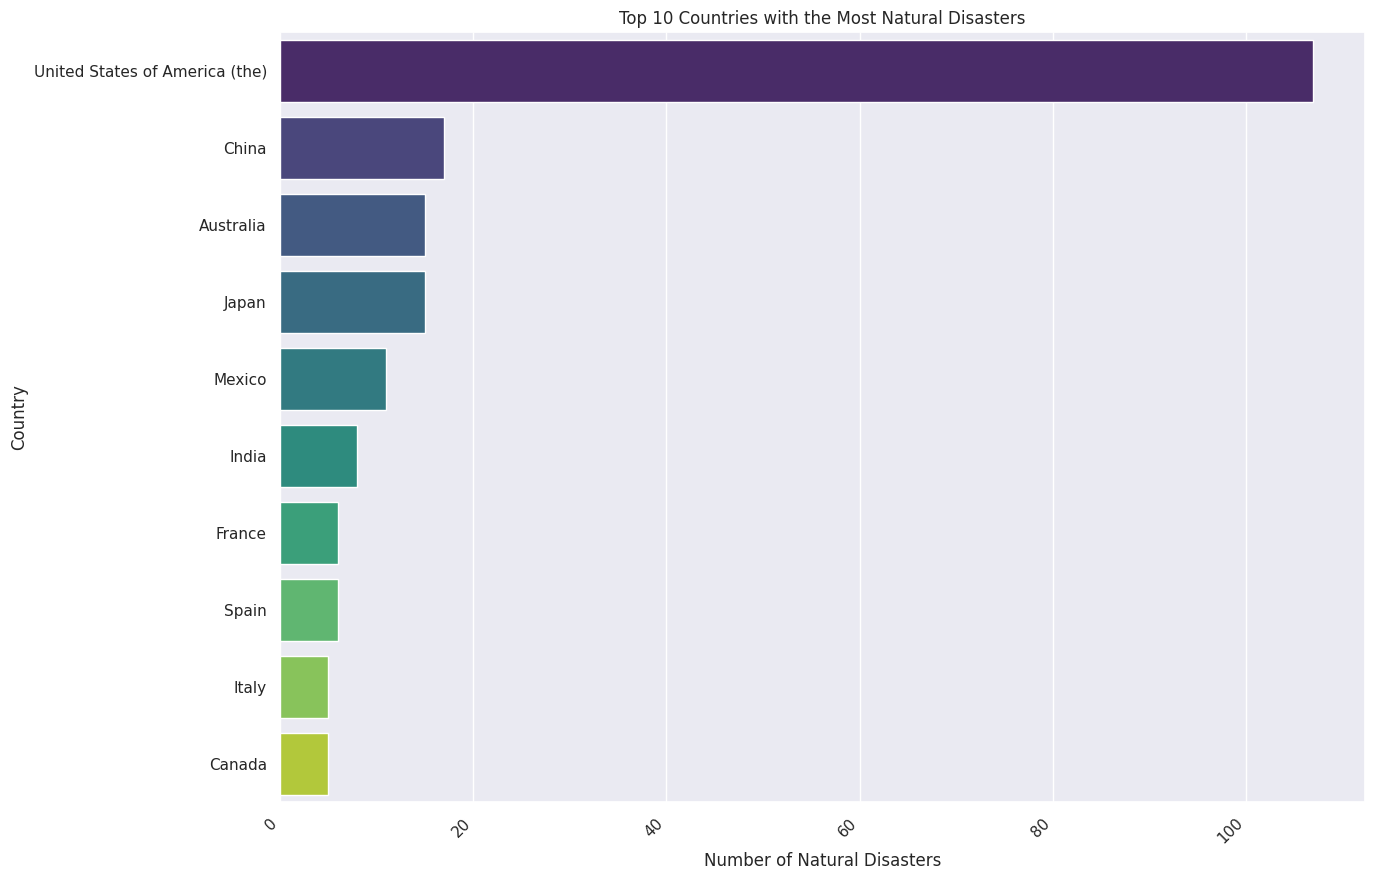

In [ ]:
# Count occurrences of each country
country_counts = df1['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Sort the DataFrame by count in descending order
country_counts = country_counts.sort_values(by='Count', ascending=False)

# Select only the first 10 rows (top 10 countries)
top_10_countries = country_counts.head(10)

# Plotting the bar chart with adjusted size and rotated labels
plt.figure(figsize=(14, 10))
sns.barplot(x='Count', y='Country', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries with the Most Natural Disasters')
plt.xlabel('Number of Natural Disasters')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

In [ ]:
df1 = df1.dropna()  # Fix typo: inplace=True is missing

In [ ]:
merged_data = pd.merge(stock_data, df1, on='Date', how='inner')


In [ ]:
merged_data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$)
0,2010-04-06,MMM,54.504780,84.349998,84.470001,83.550003,83.900002,3208500.0,Flood,Colombia,418.0,14000.0,1000000.0
1,2010-04-06,AOS,7.473090,8.988333,9.040000,8.858333,8.888333,1264800.0,Flood,Colombia,418.0,14000.0,1000000.0
2,2010-04-06,ABT,18.614557,25.352633,25.486977,25.227884,25.367025,15102334.0,Flood,Colombia,418.0,14000.0,1000000.0
3,2010-04-06,ACN,31.914417,41.520000,42.310001,41.450001,42.020000,5802000.0,Flood,Colombia,418.0,14000.0,1000000.0
4,2010-04-06,ADBE,35.700001,35.700001,35.930000,35.549999,35.560001,4211400.0,Flood,Colombia,418.0,14000.0,1000000.0


In [ ]:
merged_data.isnull().sum(axis=0)

Date                          0
Symbol                        0
Adj Close                     0
Close                         0
High                          0
Low                           0
Open                          0
Volume                        0
Disaster Type                 0
Country                       0
Total Deaths                  0
Insured Damages ('000 US$)    0
Total Damages ('000 US$)      0
dtype: int64

In [ ]:

print("Natural Disaster Statistics:")
print(merged_data.describe(include="all"))  # Include categorical data

Natural Disaster Statistics:
                                 Date Symbol     Adj Close         Close  \
count                           65002  65002  65002.000000  65002.000000   
unique                            NaN    401           NaN           NaN   
top                               NaN    MMM           NaN           NaN   
freq                              NaN    171           NaN           NaN   
mean    2015-05-22 21:48:13.978647040    NaN     69.278504     78.069309   
min               2010-04-06 00:00:00    NaN      0.730000      0.730000   
25%               2013-01-17 00:00:00    NaN     25.440935     31.500000   
50%               2015-09-09 00:00:00    NaN     44.067215     52.490002   
75%               2017-06-07 00:00:00    NaN     73.836451     86.057499   
max               2021-03-18 00:00:00    NaN   4421.850098   4421.850098   
std                               NaN    NaN    132.907163    133.809087   

                High           Low          Open        Vo

In [ ]:
merged_data.shape

(65002, 13)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

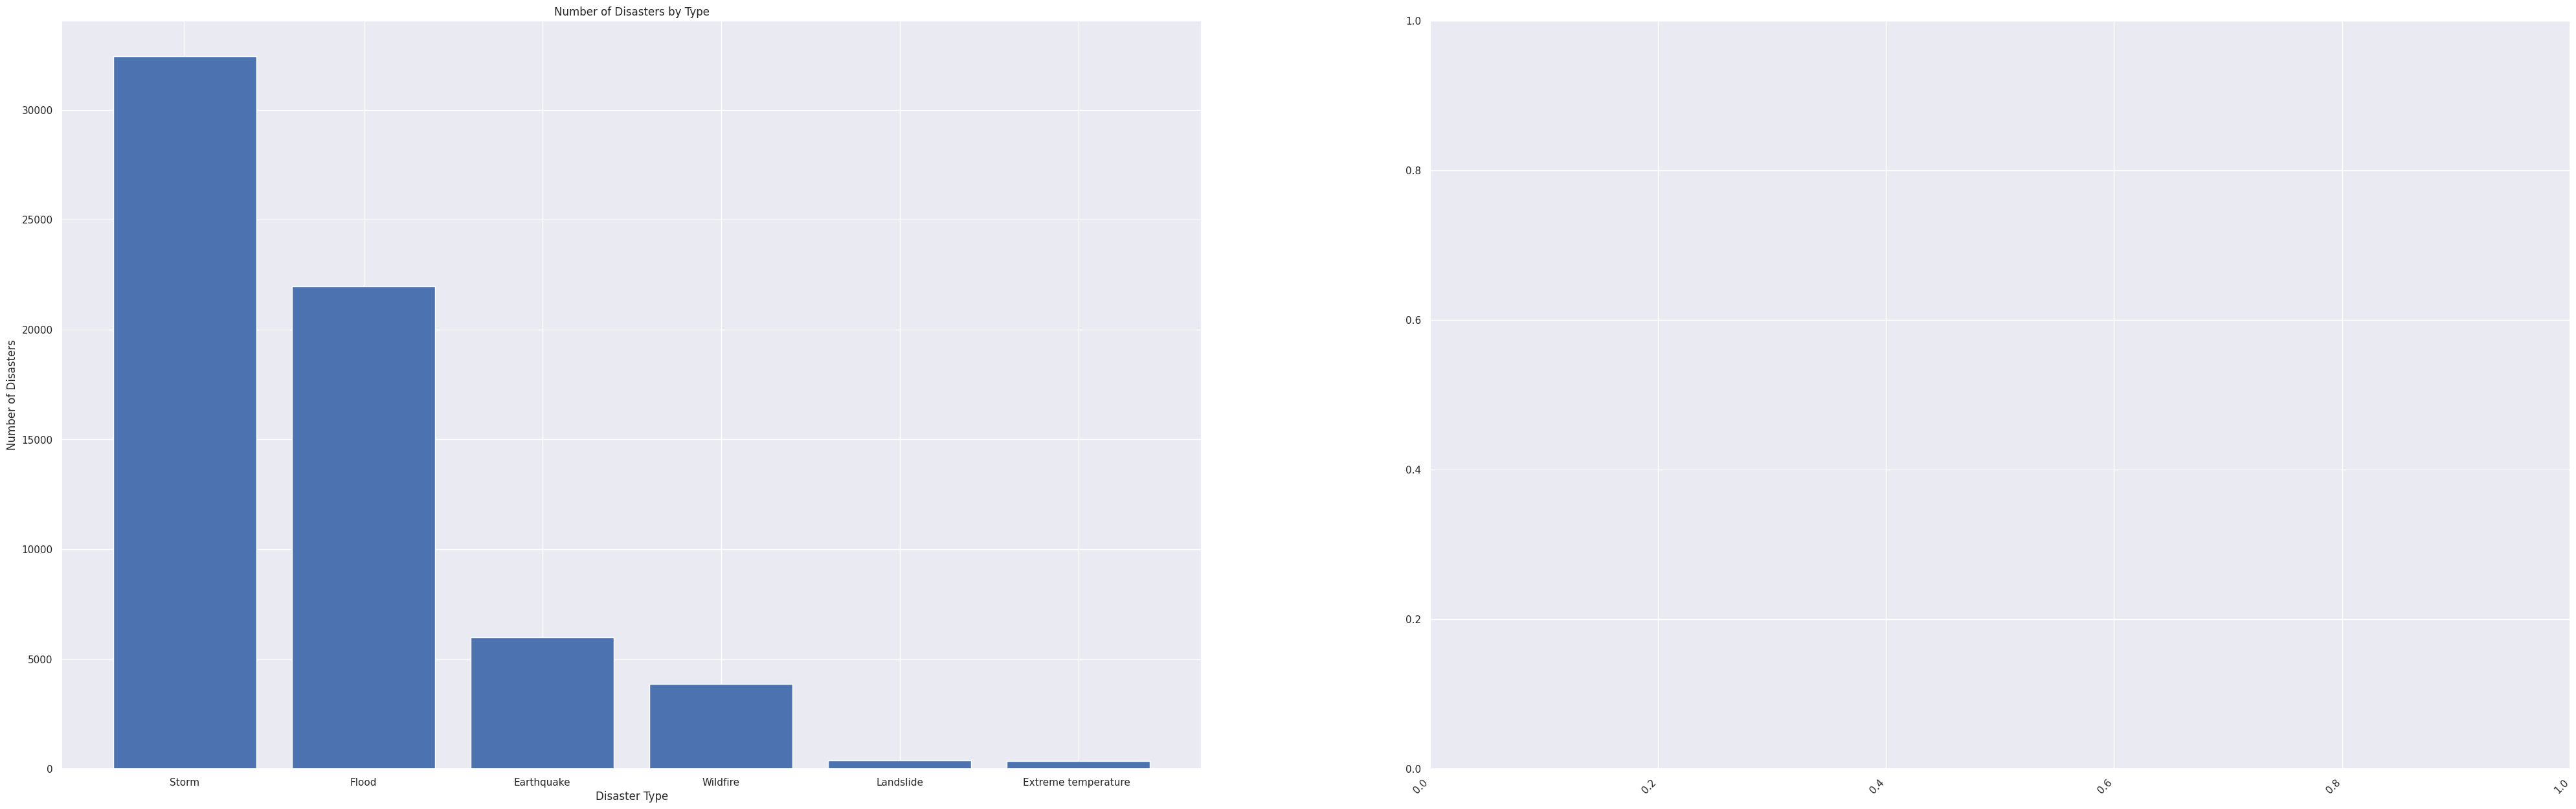

In [ ]:
# Assuming columns named 'Disaster_Type' (or similar) and 'Fatalities'
disaster_counts = merged_data['Disaster Type'].value_counts()  # Count disasters by type
total_fatalities = merged_data['Total Deaths'].sum()  # Total lives lost

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50,15))

# Subplot 1: Disaster Count Bar Plot
ax1.bar(disaster_counts.index, disaster_counts.values)
ax1.set_xlabel("Disaster Type")
ax1.set_ylabel("Number of Disasters")
ax1.set_title("Number of Disasters by Type")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability


In [ ]:

# Function to calculate average return within a window
def calculate_avg_return(window_data):
  # Assuming 'Adj Close' column exists for adjusted closing prices
  daily_returns = window_data['Adj Close'].pct_change()
  return daily_returns.mean()

print("Imports and function definition completed.")


Imports and function definition completed.


In [ ]:
# Define pre-event, event, and post-event window sizes (in days)
pre_window = 5  # Adjust as needed
event_window = 1  # Adjust as needed (consider disaster duration)
post_window = 10  # Adjust as needed

print(f"Pre-event window: {pre_window} days")
print(f"Event window: {event_window} days")
print(f"Post-event window: {post_window} days")

Pre-event window: 5 days
Event window: 1 days
Post-event window: 10 days


In [ ]:
# Filter data for disaster events (assuming 'Disaster Type' is not null)
disaster_data = merged_data[merged_data['Disaster Type'].notnull()]

print(f"Number of disaster events found: {len(disaster_data)}")


Number of disaster events found: 65002


In [ ]:
stock_companies= pd.read_csv('/content/sp500_companies.csv')

In [ ]:
stock_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        502 non-null    float64
 10  City                 503 non-null    object 
 11  State                483 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    494 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503 non-null    flo

In [ ]:
stock_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,404.52,3005761454080,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.063469
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,172.75,2667588091904,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.056328
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,857.74,2144349978624,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.045280
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,171.96,1786217365504,8.551500e+10,0.139,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.037717
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,138.94,1721230426112,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.036345


In [ ]:
columns_to_drop = ['State', 'Shortname', 'City', 'Currentprice','Marketcap','Longbusinesssummary', 'Fulltimeemployees', 'Exchange', 'Country', 'Ebitda']
stock_companies.drop(columns=columns_to_drop, inplace=True)

In [ ]:
added_data=  pd.merge(merged_data, stock_companies, on='Symbol', how='left')

In [ ]:
added_data.shape

(65002, 18)

In [ ]:
added_data.dropna()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$),Longname,Sector,Industry,Revenuegrowth,Weight
0,2010-04-06,MMM,54.504780,84.349998,84.470001,83.550003,83.900002,3208500.0,Flood,Colombia,418.0,14000.0,1000000.0,3M Company,Industrials,Conglomerates,-0.008,0.001098
1,2010-04-06,AOS,7.473090,8.988333,9.040000,8.858333,8.888333,1264800.0,Flood,Colombia,418.0,14000.0,1000000.0,A. O. Smith Corporation,Industrials,Specialty Industrial Machinery,0.056,0.000265
2,2010-04-06,ABT,18.614557,25.352633,25.486977,25.227884,25.367025,15102334.0,Flood,Colombia,418.0,14000.0,1000000.0,Abbott Laboratories,Healthcare,Medical Devices,0.015,0.004404
3,2010-04-06,ACN,31.914417,41.520000,42.310001,41.450001,42.020000,5802000.0,Flood,Colombia,418.0,14000.0,1000000.0,Accenture plc,Technology,Information Technology Services,0.030,0.004941
4,2010-04-06,ADBE,35.700001,35.700001,35.930000,35.549999,35.560001,4211400.0,Flood,Colombia,418.0,14000.0,1000000.0,Adobe Inc.,Technology,Software - Infrastructure,0.116,0.005355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64997,2021-03-18,RF,19.071905,21.459999,22.200001,21.389999,21.570000,10846900.0,Flood,Australia,2.0,410000.0,2100000.0,Regions Financial Corporation,Financial Services,Banks - Regional,0.156,0.000380
64998,2021-03-18,RSG,92.604607,96.720001,97.099998,94.180000,94.489998,1571700.0,Flood,Australia,2.0,410000.0,2100000.0,"Republic Services, Inc.",Industrials,Waste Management,0.086,0.001224
64999,2021-03-18,RMD,180.496368,185.089996,191.100006,184.850006,190.009995,627300.0,Flood,Australia,2.0,410000.0,2100000.0,ResMed Inc.,Healthcare,Medical Instruments & Supplies,0.125,0.000589
65000,2021-03-18,RVTY,126.559998,126.559998,129.479996,124.639999,124.879997,819400.0,Flood,Australia,2.0,410000.0,2100000.0,"Revvity, Inc.",Healthcare,Diagnostics & Research,-0.061,0.000285


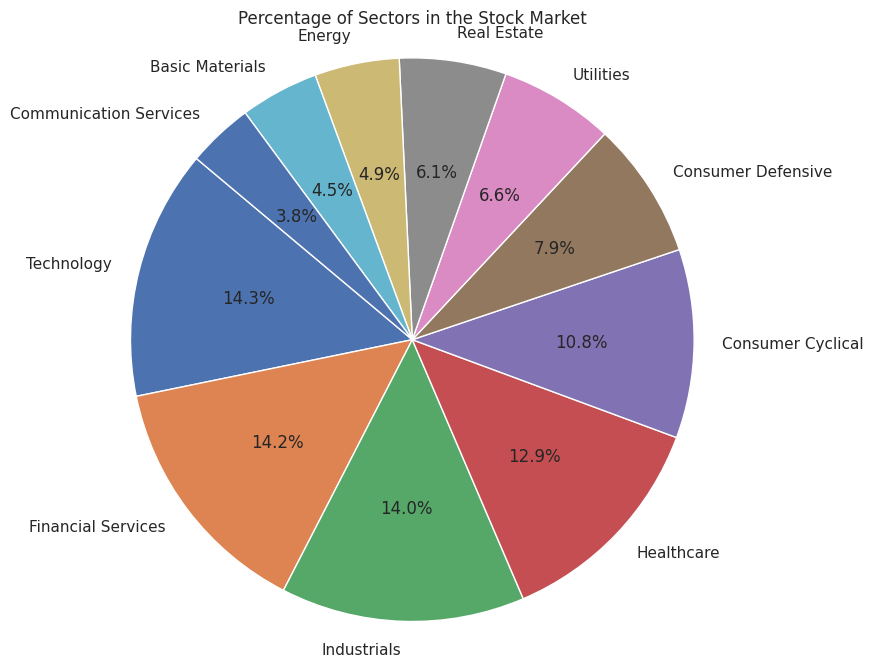

Total number of companies: 398


In [ ]:
# Calculate the count of sectors
sector_counts = added_data['Sector'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sectors in the Stock Market')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Count the number of unique companies
total_companies = added_data['Longname'].nunique()

print("Total number of companies:", total_companies)

In [ ]:
disaster_data = added_data[added_data['Disaster Type'].notna()]


In [ ]:
disaster_groups = disaster_data.groupby(['Disaster Type', 'Sector'])


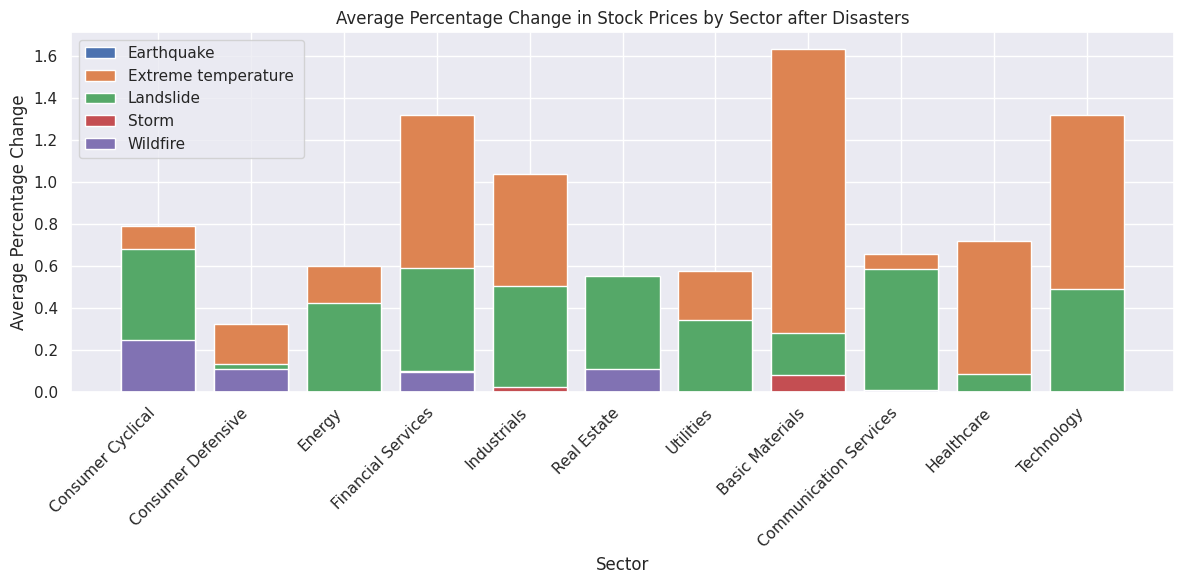

In [ ]:

# Calculate percentage change in stock prices
added_data['Percentage Change'] = (added_data['Close'] - added_data['Open']) / added_data['Open'] * 100

# Group by disaster type and sector/industry to find the average percentage change
average_percentage_change = added_data.groupby(['Disaster Type', 'Sector'])['Percentage Change'].mean().reset_index()

# Filter out sectors/industries with positive average percentage change after a disaster
positive_changes = average_percentage_change[average_percentage_change['Percentage Change'] > 0]

# Plotting
plt.figure(figsize=(12, 6))
for disaster_type, data in positive_changes.groupby('Disaster Type'):
    plt.bar(data['Sector'], data['Percentage Change'], label=disaster_type)

plt.xlabel('Sector')
plt.ylabel('Average Percentage Change')
plt.title('Average Percentage Change in Stock Prices by Sector after Disasters')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
added_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65002 entries, 0 to 65001
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        65002 non-null  datetime64[ns]
 1   Symbol                      65002 non-null  object        
 2   Adj Close                   65002 non-null  float64       
 3   Close                       65002 non-null  float64       
 4   High                        65002 non-null  float64       
 5   Low                         65002 non-null  float64       
 6   Open                        65002 non-null  float64       
 7   Volume                      65002 non-null  float64       
 8   Disaster Type               65002 non-null  object        
 9   Country                     65002 non-null  object        
 10  Total Deaths                65002 non-null  float64       
 11  Insured Damages ('000 US$)  65002 non-null  float64   

In [ ]:
# List of all unique disaster types
disaster_types = added_data['Disaster Type'].unique()

# Iterate over each unique disaster type
for disaster_type in disaster_types:
    # Create a new column for the current disaster type and set it to 1 if it matches, 0 otherwise
    added_data[disaster_type] = (added_data['Disaster Type'] == disaster_type).astype(int)


In [ ]:
columns_to_delete = ["Insured Damages ('000 US$)", "Disaster Type","Weight","Percentage Change","Total Damages ('000 US$)",'Volume','Total Deaths','Revenuegrowth','Longname','Industry','Country','Sector']
added_data.drop(columns=columns_to_delete, inplace=True)

In [ ]:
columns_to_delete = ['Symbol']
added_data.drop(columns=columns_to_delete, inplace=True)

In [ ]:
added_data.dropna(inplace=True)

In [ ]:
# Convert 'Date' column to datetime format
added_data['Date'] = pd.to_datetime(added_data['Date'])

# Sort data by date (assuming it's not already sorted)
added_data.sort_values('Date', inplace=True)

# Set 'Date' column as the index
added_data.set_index('Date', inplace=True)

In [ ]:
# Convert specific columns from int to float
columns_to_convert = ['Flood', 'Storm', 'Earthquake','Wildfire','Landslide','Extreme temperature ']
added_data[columns_to_convert] = added_data[columns_to_convert].astype(float)


In [ ]:
added_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65002 entries, 2010-04-06 to 2021-03-18
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Adj Close             65002 non-null  float64
 1   Close                 65002 non-null  float64
 2   High                  65002 non-null  float64
 3   Low                   65002 non-null  float64
 4   Open                  65002 non-null  float64
 5   Flood                 65002 non-null  float64
 6   Storm                 65002 non-null  float64
 7   Extreme temperature   65002 non-null  float64
 8   Earthquake            65002 non-null  float64
 9   Wildfire              65002 non-null  float64
 10  Landslide             65002 non-null  float64
dtypes: float64(11)
memory usage: 6.0 MB


In [ ]:
non_normalized_data = added_data[['Open','Adj Close','High','Low']]

In [ ]:
normalized_data= added_data[['Storm', 'Wildfire','Earthquake', 'Flood', 'Extreme temperature ']]

In [ ]:
added = added_data.copy()

In [ ]:
# Calculate quartiles
Q1 = np.percentile(added, 25)
Q3 = np.percentile(added, 75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Clip outliers
added[added > upper_bound] = upper_bound
added[added < lower_bound] = lower_bound


In [ ]:
# prompt: provide range for minmax scaler 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(non_normalized_data)


In [ ]:
#Normalized features that are not normalized

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_features= scaler.fit_transform(non_normalized_data)

In [ ]:
normalized_label = scaler.fit_transform(added['Close'].to_numpy().reshape(-1, 1))

In [ ]:
#Features and Labels
features = np.concatenate((non_normalized_data,normalized_data), axis=1)
labels = added_data['Close']

In [ ]:
# Train-validation-test split
X_train, X_val_test, y_train, y_val_test = train_test_split(features, normalized_label, test_size=0.2, random_state=42)

# Further split the validation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


X_train shape: (52001, 8)
X_val shape: (6500, 8)
X_test shape: (6501, 8)
y_train shape: (52001, 1)
y_val shape: (6500, 1)
y_test shape: (6501, 1)


In [ ]:
model = Sequential()  # Adjust for 1 feature
model.add(LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])))  # Adjust for actual shape
model.add(Dropout(0.1))

model.add(LSTM(64))
model.add(Dense(1))


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience=5, verbose =2)

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             18688     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 51777 (202.25 KB)
Trainable params: 51777 (202.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np

# Reshape input data to add a time step dimension
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)


In [ ]:
print(data.shape)  # Print the shape of data to verify it has at least two dimensions


(5, 3)


In [ ]:
# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1626/1626 [==============================] - 29s 7ms/step - loss: 0.0042 - val_loss: 4.7913e-04
Epoch 2/10
1626/1626 [==============================] - 7s 4ms/step - loss: 6.2303e-04 - val_loss: 3.0300e-04
Epoch 3/10
1626/1626 [==============================] - 11s 7ms/step - loss: 3.9274e-04 - val_loss: 2.4057e-04
Epoch 4/10
1626/1626 [==============================] - 10s 6ms/step - loss: 2.8189e-04 - val_loss: 2.3460e-04
Epoch 5/10
1626/1626 [==============================] - 7s 4ms/step - loss: 2.3553e-04 - val_loss: 1.0526e-04
Epoch 6/10
1626/1626 [==============================] - 9s 6ms/step - loss: 2.0664e-04 - val_loss: 1.2908e-04
Epoch 7/10
1626/1626 [==============================] - 12s 7ms/step - loss: 1.9783e-04 - val_loss: 8.1727e-05
Epoch 8/10
1626/1626 [==============================] - 7s 5ms/step - loss: 1.6921e-04 - val_loss: 1.1233e-04
Epoch 9/10
1626/1626 [==============================] - 9s 5ms/step - loss: 1.6013e-04 - val_loss: 8.9883e-05
Epoch 10/1

In [83]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)

# Print the test loss
print("Test Loss:", test_loss)


204/204 [==============================] - 1s 6ms/step - loss: 9.4509e-05
Test Loss: 9.450867946725339e-05


Epoch 1/10
1626/1626 [==============================] - 38s 13ms/step - loss: 1.4670e-04 - val_loss: 5.9670e-05
Epoch 2/10
1626/1626 [==============================] - 9s 5ms/step - loss: 1.4975e-04 - val_loss: 5.0006e-05
Epoch 3/10
1626/1626 [==============================] - 9s 5ms/step - loss: 1.3655e-04 - val_loss: 2.3641e-04
Epoch 4/10
1626/1626 [==============================] - 12s 8ms/step - loss: 1.3089e-04 - val_loss: 1.2450e-04
Epoch 5/10
1626/1626 [==============================] - 7s 4ms/step - loss: 1.1376e-04 - val_loss: 6.3996e-05
Epoch 6/10
1626/1626 [==============================] - 9s 5ms/step - loss: 1.0908e-04 - val_loss: 4.1459e-04
Epoch 7/10
1626/1626 [==============================] - 9s 5ms/step - loss: 1.0484e-04 - val_loss: 9.4509e-05
Epoch 7: early stopping


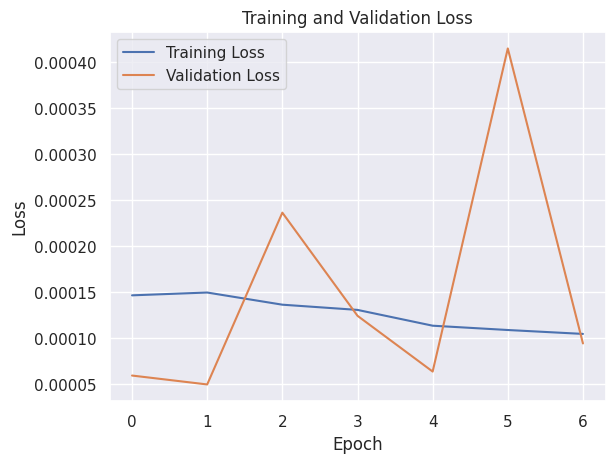

In [ ]:
# Compile and train the model
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
